In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data_file = "seizure_dataset.csv"
df = pd.read_csv(data_file)
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [19]:
df_rf = df.copy()
df_rf.drop('Unnamed', axis=1, inplace=True)

In [21]:
#preprocessing
class_relabeling = {1:1, 2:0, 3:0, 4:0, 5:0}
df_rf.replace({'y': class_relabeling}, inplace=True)
df_rf


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [23]:
#splitting into train and test sets
X = df_rf.drop(columns=['y'])
y = df_rf['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
#baseline random model 

baseline_rf = RandomForestClassifier(random_state=42, oob_score=True)
baseline_rf.fit(X_train, y_train)

y_pred_baseline = baseline_rf.predict(X_test)
y_pred_proba_baseline = baseline_rf.predict_proba(X_test)[:, 1] 

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision, baseline_recall, baseline_f1, _ = precision_recall_fscore_support(y_test, y_pred_baseline, average='binary')
baseline_auc_roc = roc_auc_score(y_test, y_pred_proba_baseline)


print(f'Baseline Accuracy: {baseline_accuracy:.2f}')
print(f'Baseline Precision: {baseline_precision:.2f}')
print(f'Baseline Recall: {baseline_recall:.2f}')
print(f'Baseline F1 Score: {baseline_f1:.2f}')
print(f'Baseline AUC-ROC Score: {baseline_auc_roc:.2f}')
print(f'Baseline OOB Score: {baseline_rf.oob_score_:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_baseline))


Baseline Accuracy: 0.98
Baseline Precision: 0.95
Baseline Recall: 0.93
Baseline F1 Score: 0.94
Baseline AUC-ROC Score: 1.00
Baseline OOB Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1840
           1       0.95      0.93      0.94       460

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300



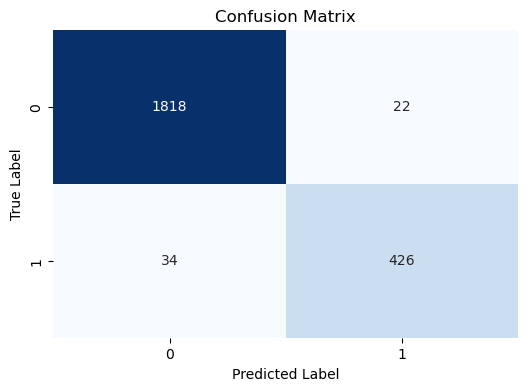

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

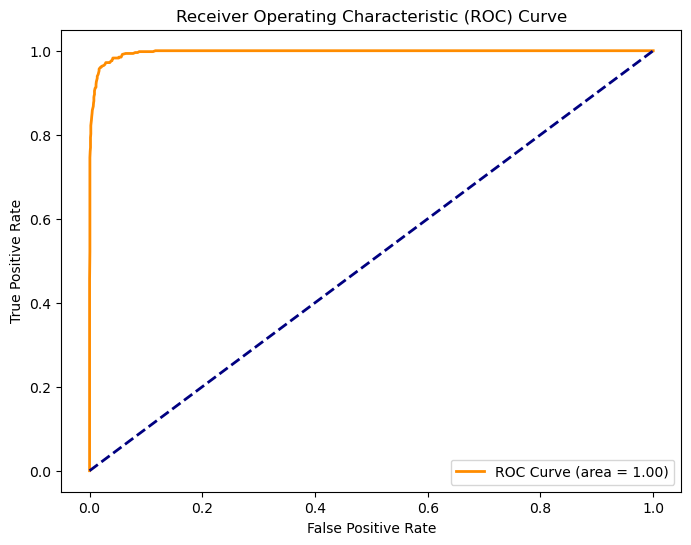

In [60]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_baseline)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

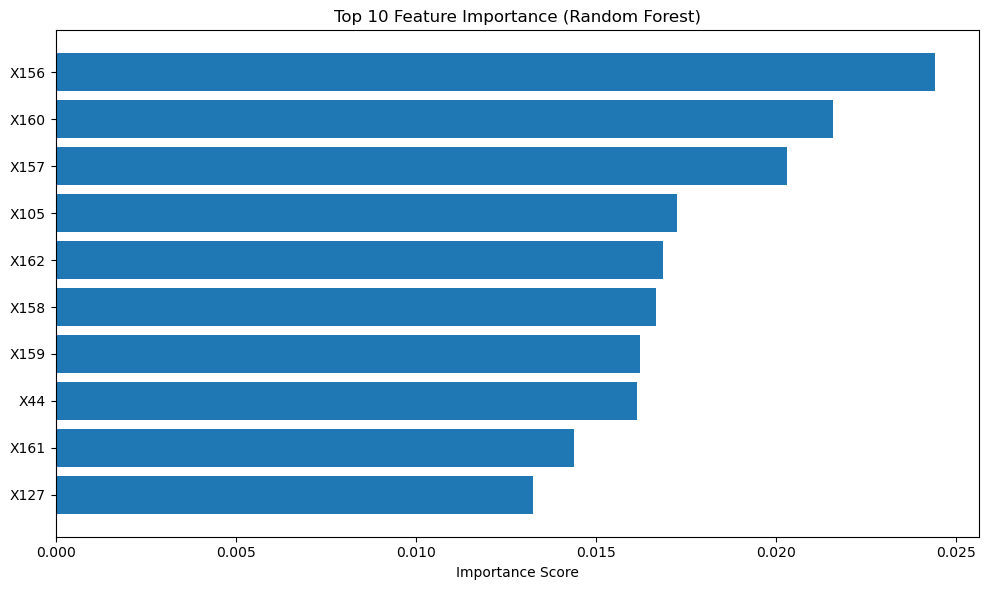

In [62]:
#Feature Importance
feature_importances = baseline_rf.feature_importances_  
features = X_train.columns  
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_ten = 10 
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_ten], fi_df['Importance'][:top_ten], color=)
plt.gca().invert_yaxis()  
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [85]:
#Hyperparameter tuning 


param_grid = {
    'max_depth': [4, 6, 8], 
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]  
}

rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,  
    scoring='roc_auc',  
    n_jobs=-1, 
    verbose=2  
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 300}


In [87]:
#Training model with the optimal parameters and using evaluation metrics
best_params = grid_search.best_params_

rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    oob_score=True, 
    random_state=42
)
rf_best.fit(X_train, y_train)

y_pred_best = rf_best.predict(X_test)
y_pred_proba_best = rf_best.predict_proba(X_test)[:, 1] 

rf_best_accuracy = accuracy_score(y_test, y_pred_best)
rf_best_precision, rf_best_recall, rf_best_f1, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary')
rf_best_auc_roc = roc_auc_score(y_test, y_pred_proba_best)


print(f'Final Accuracy: {rf_best_accuracy:.2f}')
print(f'Final Precision: {rf_best_precision:.2f}')
print(f'Final Recall: {rf_best_recall:.2f}')
print(f'Final F1 Score: {rf_best_f1:.2f}')
print(f'Final AUC-ROC Score: {rf_best_auc_roc:.2f}')
print(f'Final OOB Score: {rf_best.oob_score_:.2f}')
print('\nFinal Classification Report:')
print(classification_report(y_test, y_pred_best))


Final Accuracy: 0.96
Final Precision: 0.98
Final Recall: 0.82
Final F1 Score: 0.89
Final AUC-ROC Score: 0.99
Final OOB Score: 0.96

Final Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1840
           1       0.98      0.82      0.89       460

    accuracy                           0.96      2300
   macro avg       0.97      0.91      0.93      2300
weighted avg       0.96      0.96      0.96      2300



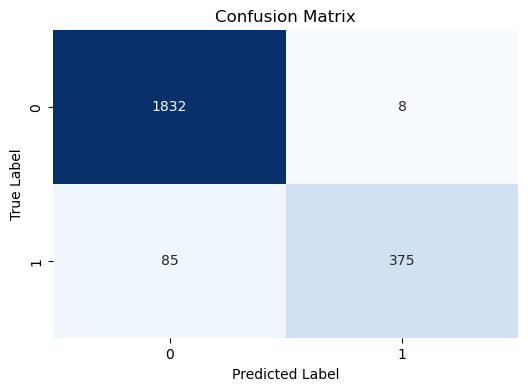

In [89]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

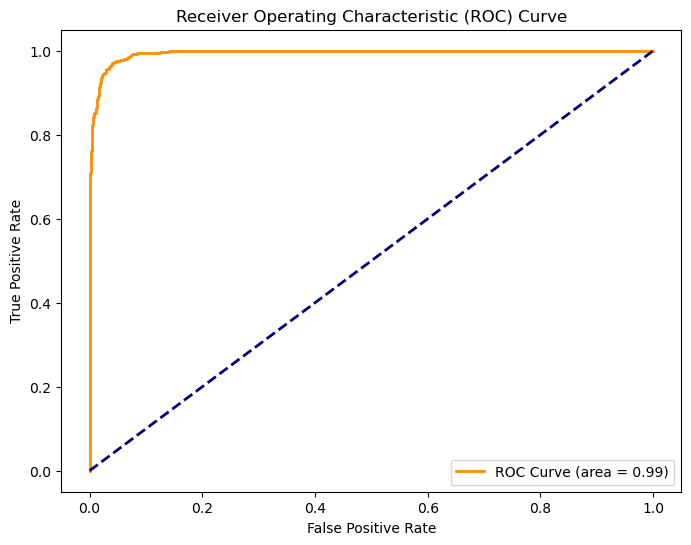

In [91]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


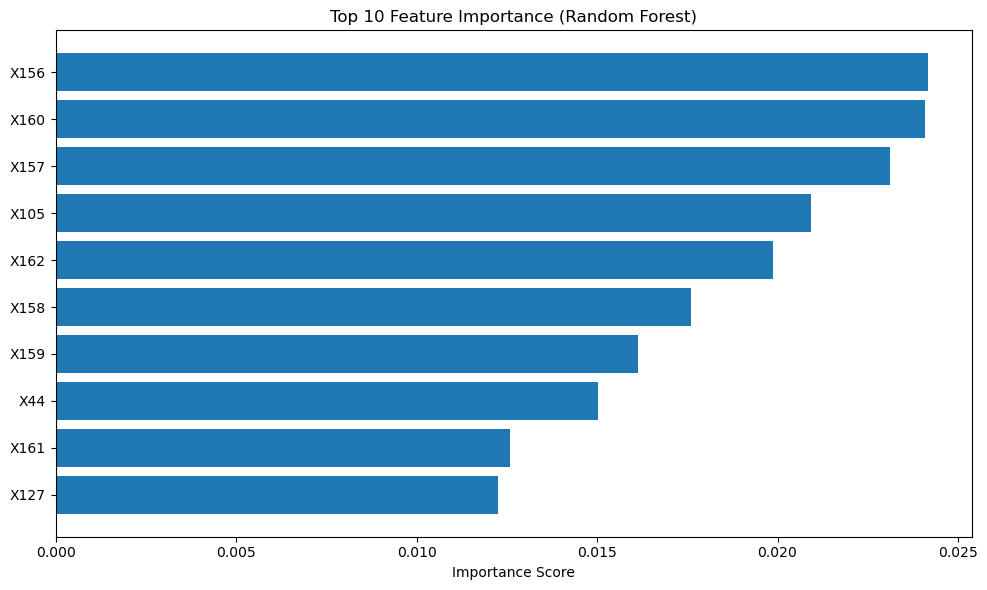

In [93]:
#Feature Importance
feature_importances = rf_best.feature_importances_  
features = X_train.columns  
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_ten = 10 
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_ten], fi_df['Importance'][:top_ten])
plt.gca().invert_yaxis()  
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()